In [1]:
import pandas as pd

# Load the dataset
wine_data = pd.read_csv('/content/white-wine-price-rating.csv')

# Inspect the dataset
wine_data.head()


,FullName,Winery,WineName,Year,Region,RegionalVariety,VintageRating,VintageRatingCount,WineRating,WineRatingCount,VintagePrice,WinePrice,VintageRatingPriceRatio,WineRatingPriceRatio
0,Domaine Coche-Dury Meursault Les Rougeots 2001,Domaine Coche-Dury,Meursault Les Rougeots,2001,Burgundy,Côte de Beaune White,4.9,25,4.7,755,806.580,806.580,0.006075,0.005827
1,Joseph Drouhin Montrachet Grand Cru Marquis de...,Joseph Drouhin,Montrachet Grand Cru Marquis de Laguiche,2015,Burgundy,Côte de Beaune White,4.8,46,4.6,1191,680.000,680.000,0.007059,0.006765
2,Marcassin Marcassin Vineyard Chardonnay 2013,Marcassin,Marcassin Vineyard Chardonnay,2013,Californian,Chardonnay,4.8,28,4.6,884,448.000,448.000,0.010714,0.010268
3,M. Chapoutier Ermitage Le Méal Blanc 2006,M. Chapoutier,Ermitage Le Méal Blanc,2006,Northern Rhône,White,4.8,31,4.5,414,164.675,164.675,0.029148,0.027327
4,Domaine Coche-Dury Corton-Charlemagne Grand Cr...,Domaine Coche-Dury,Corton-Charlemagne Grand Cru,2007,Burgundy,Côte de Beaune White,4.8,35,4.7,454,3478.360,3478.360,0.001380,0.001351


In [3]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Handling missing values
imputer = SimpleImputer(strategy='mean')
wine_data_imputed = pd.DataFrame(imputer.fit_transform(wine_data.select_dtypes(include=[np.number])))

# Normalizing the data
scaler = StandardScaler()
wine_data_normalized = scaler.fit_transform(wine_data_imputed)


In [4]:
!pip install umap-learn
from umap import UMAP

# Apply UMAP
umap_model = UMAP(n_components=2, random_state=42)
wine_data_umap = umap_model.fit_transform(wine_data_normalized)

# Convert to DataFrame for visualization
wine_data_umap_df = pd.DataFrame(wine_data_umap, columns=['UMAP1', 'UMAP2'])


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 5.8 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=80c3b1b1758059048427187328a3a63cce7fbfdbbe5d931daf7206fa79c957c9
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


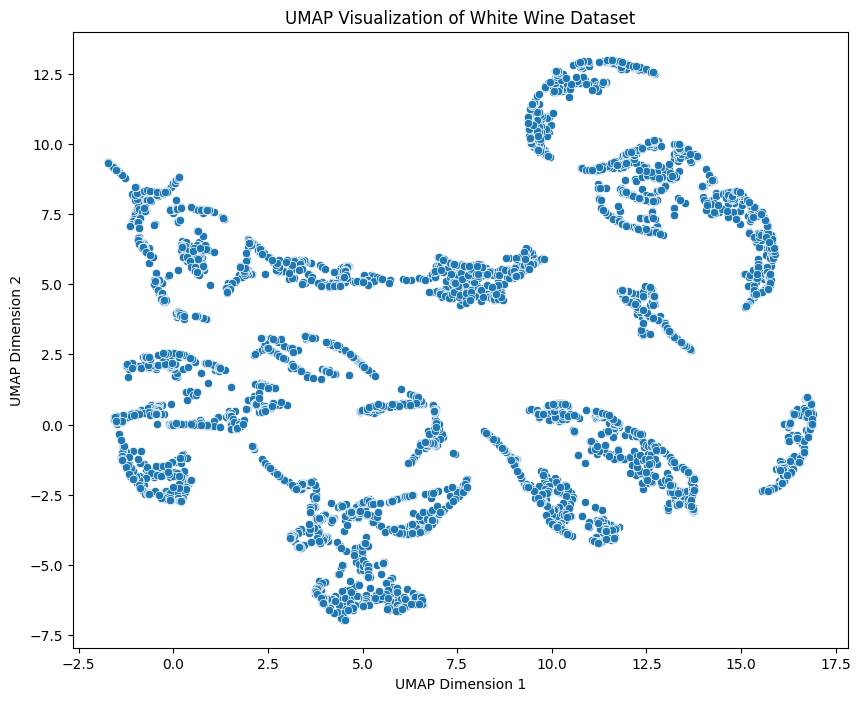

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter Plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='UMAP1', y='UMAP2', data=wine_data_umap_df)
plt.title('UMAP Visualization of White Wine Dataset')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.show()


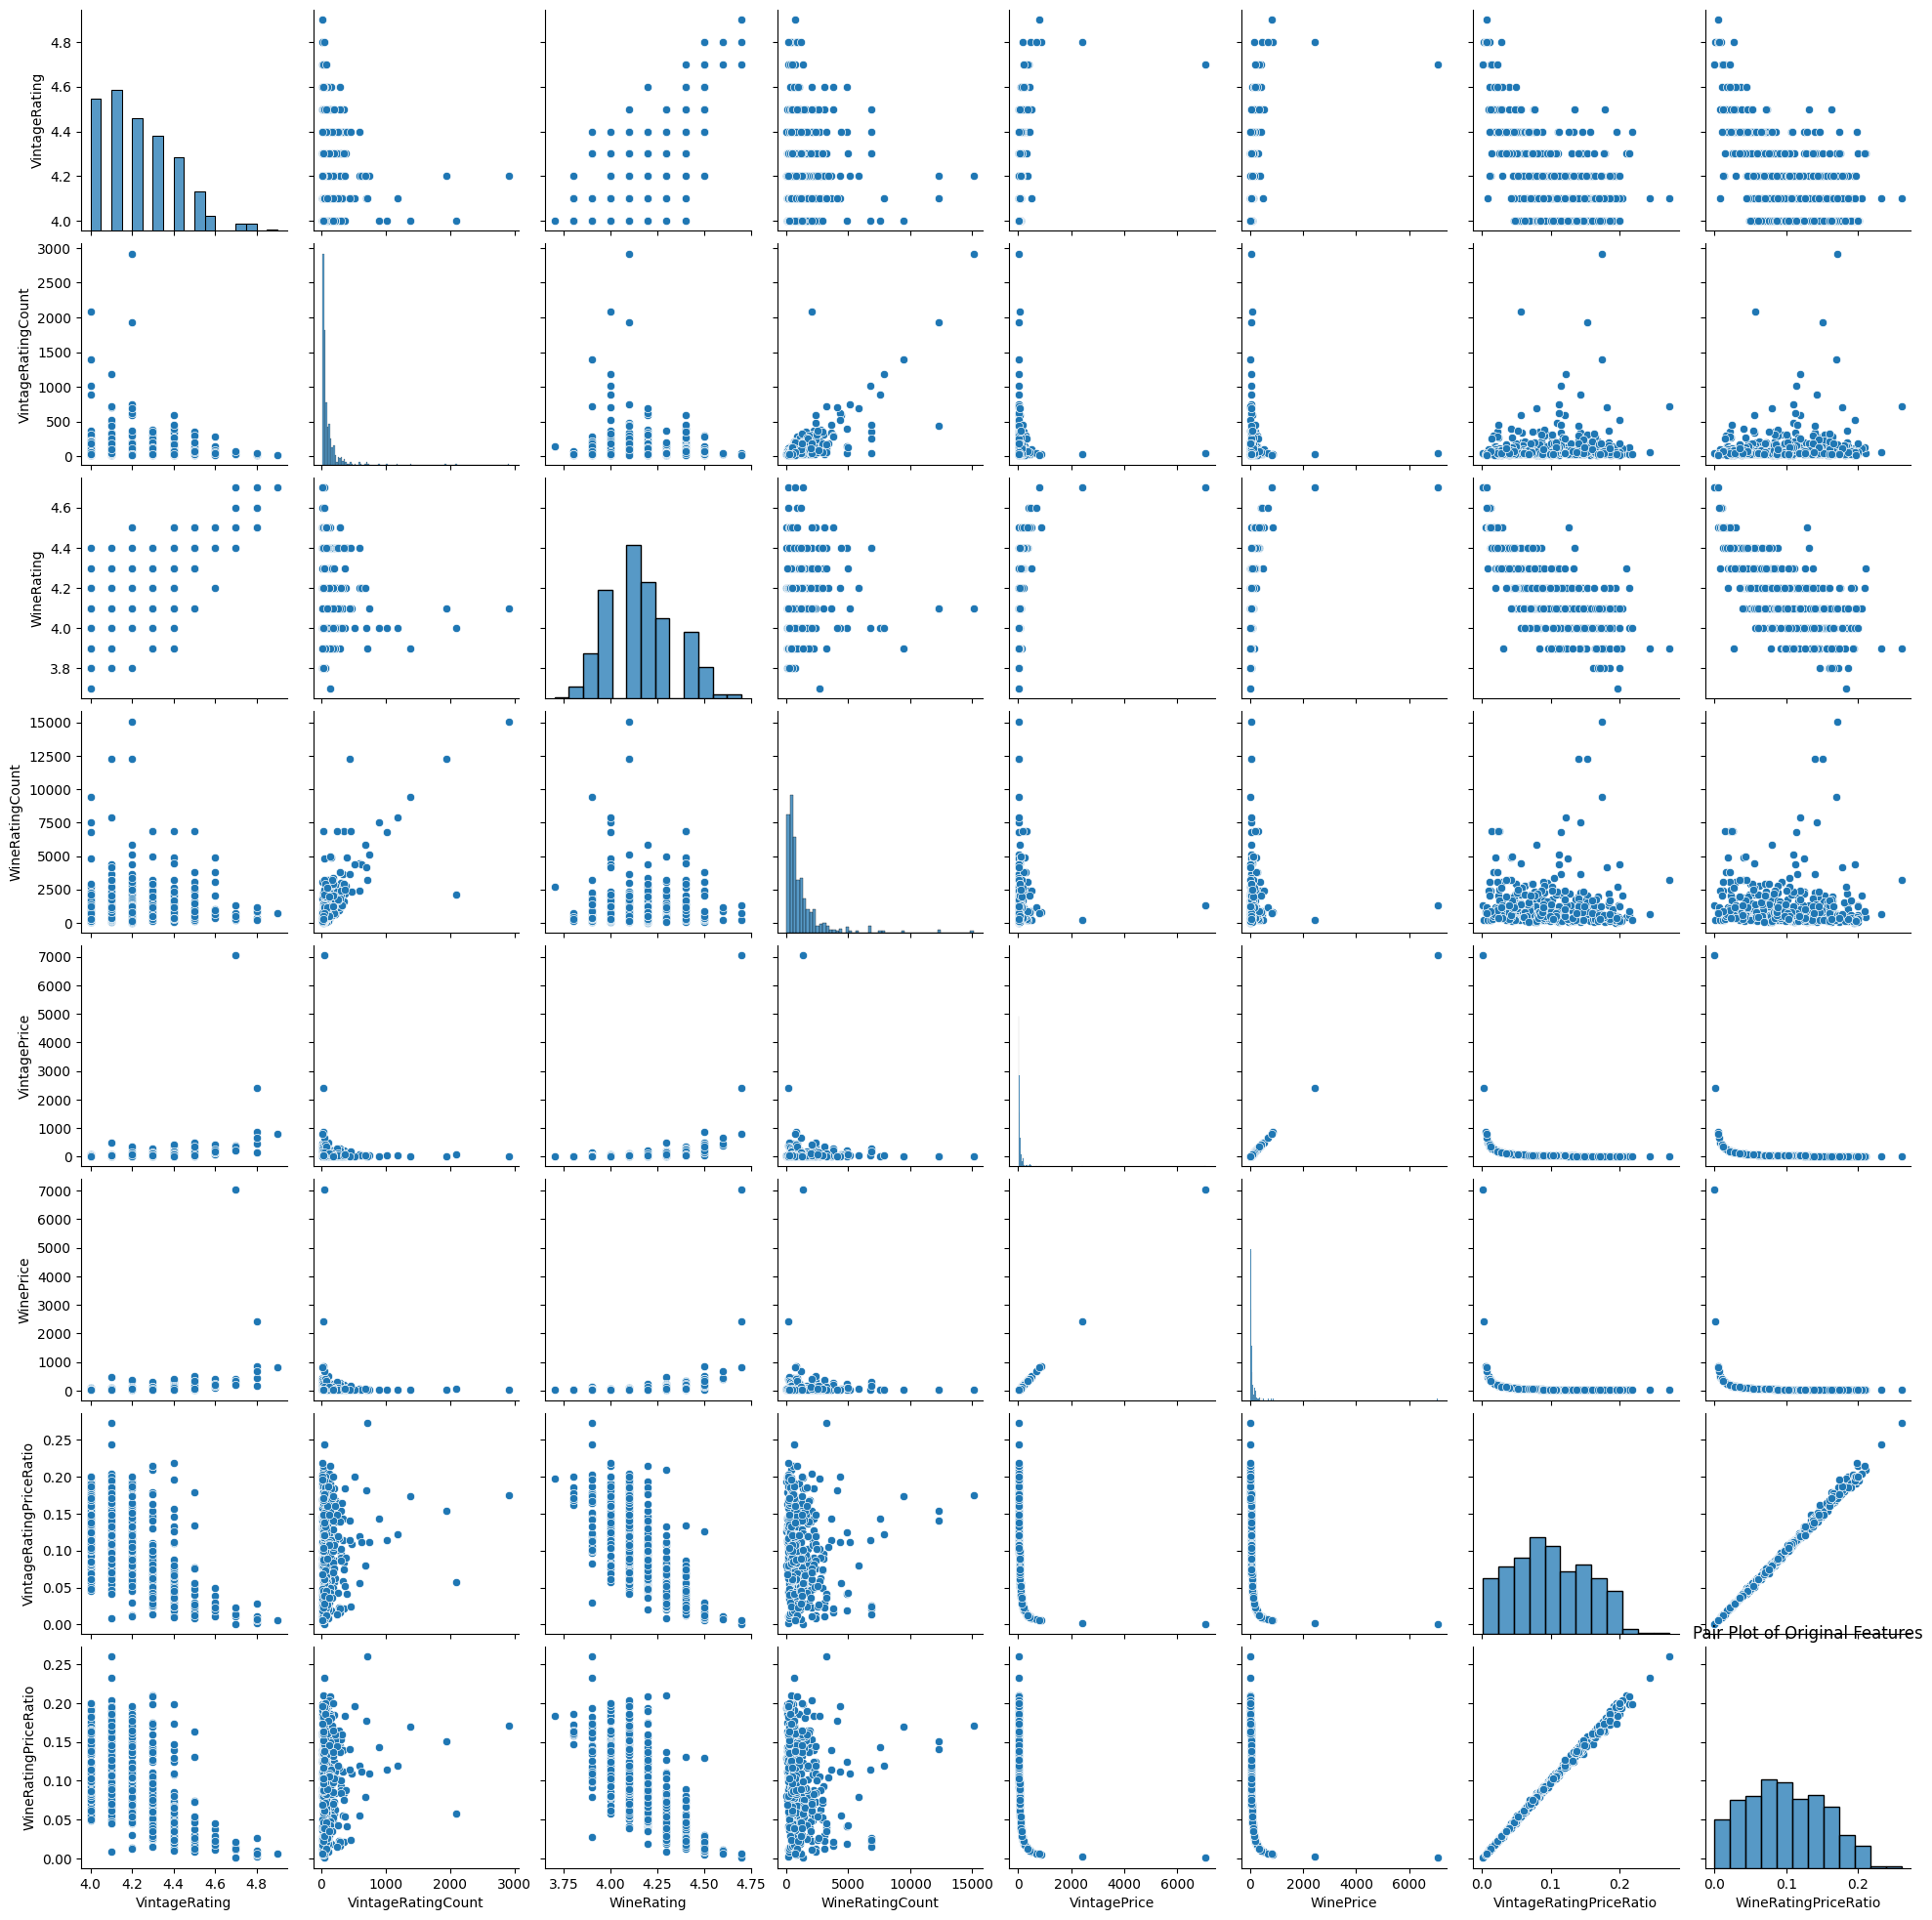

<ipython-input-6-74f0c1162223>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(wine_data.corr(), annot=True, fmt=".2f")


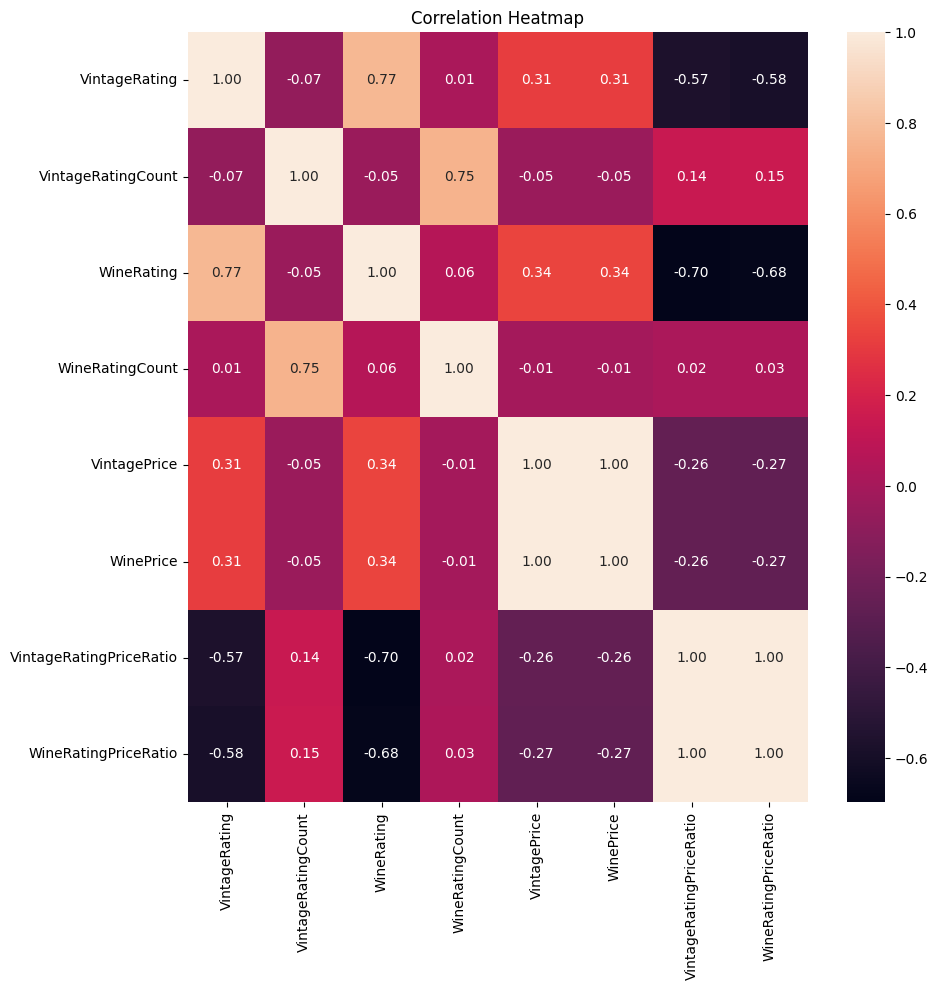

In [6]:
# Pair Plot
sns.pairplot(wine_data.sample(frac=0.1))  # Adjust the fraction as needed
plt.title('Pair Plot of Original Features')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(wine_data.corr(), annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


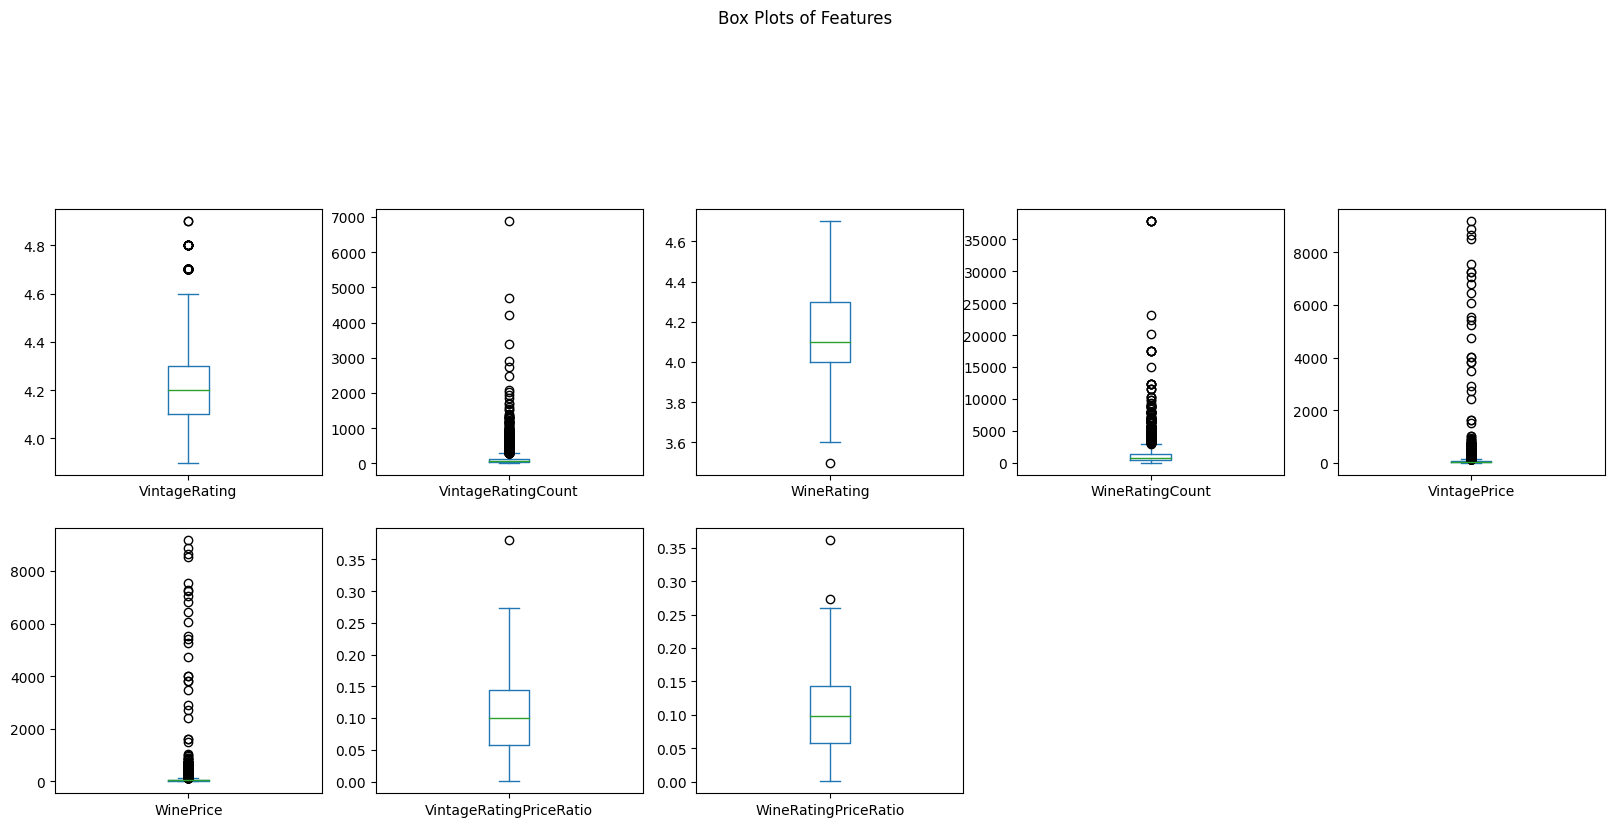

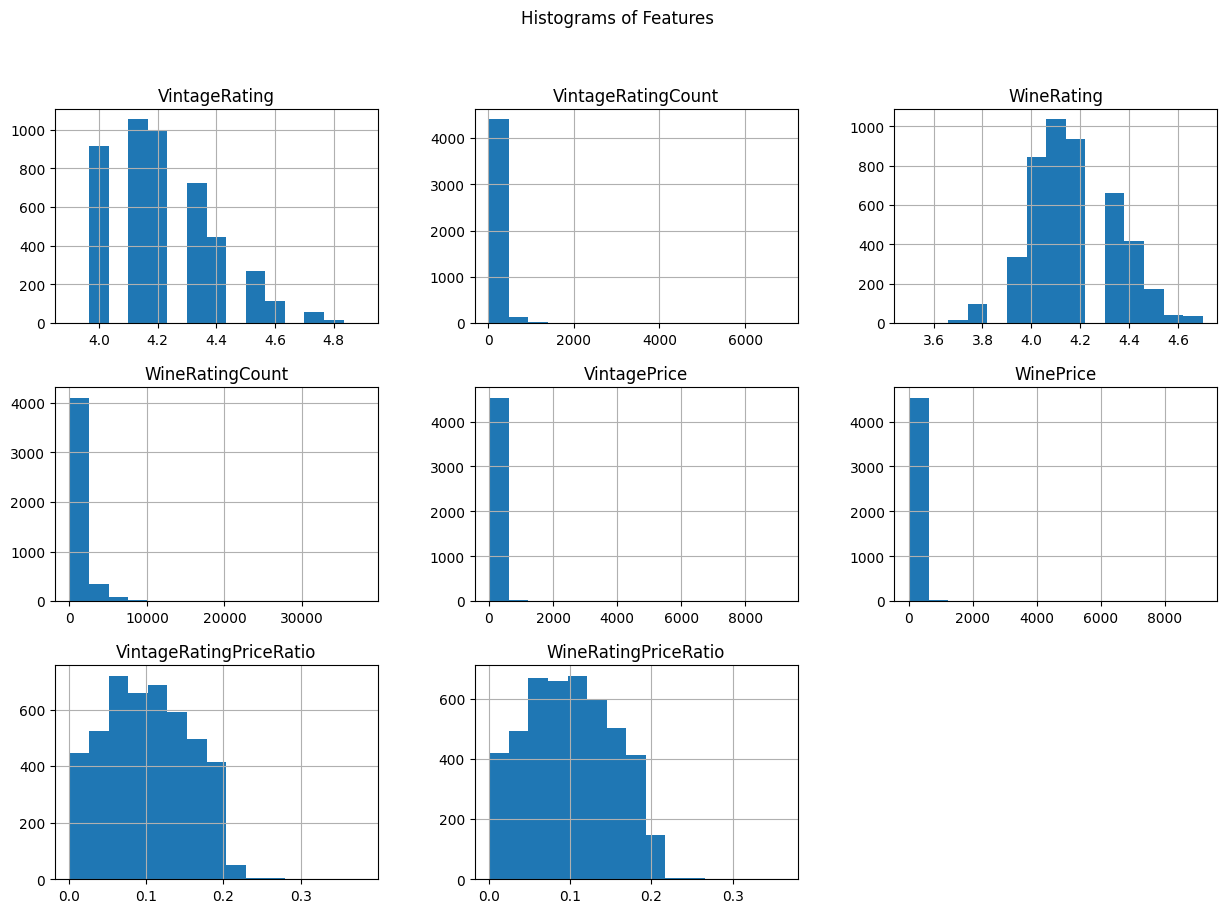

In [8]:
# Box Plots for each feature
wine_data.plot(kind='box', subplots=True, layout=(5,5), figsize=(20, 20))
plt.suptitle("Box Plots of Features")
plt.show()

# Histograms for each feature
wine_data.hist(bins=15, figsize=(15, 10))
plt.suptitle('Histograms of Features')
plt.show()


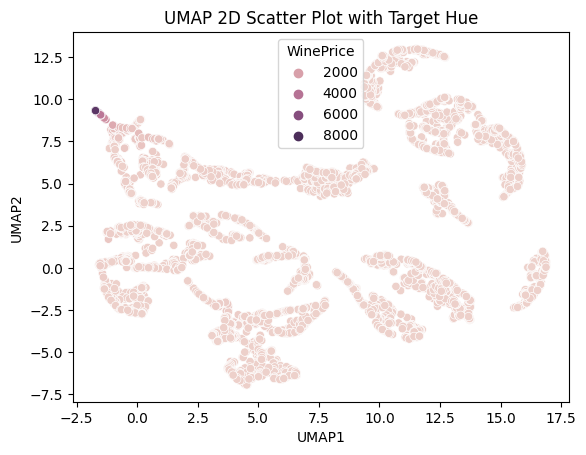

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


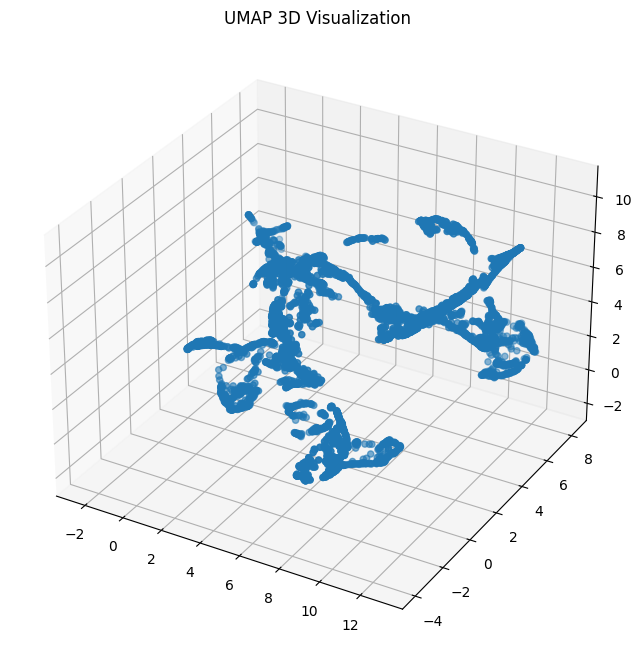

In [10]:
# 2D UMAP Scatter Plot (If you have a target variable)
sns.scatterplot(x='UMAP1', y='UMAP2', hue=wine_data['WinePrice'], data=wine_data_umap_df)  # Replace 'target'
plt.title('UMAP 2D Scatter Plot with Target Hue')
plt.show()

# 3D UMAP Visualization (If UMAP was done in 3D)
from mpl_toolkits.mplot3d import Axes3D

umap_3d = UMAP(n_components=3, random_state=42)
wine_data_umap_3d = umap_3d.fit_transform(wine_data_normalized)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(wine_data_umap_3d[:, 0], wine_data_umap_3d[:, 1], wine_data_umap_3d[:, 2])
plt.title('UMAP 3D Visualization')
plt.show()
